## This notebook is to calculate the fraction of sequences from each month that have been uploaded to GISAID and the data portal

### Notebook created: Apr 3, 2022
### Last updated: Apr 3, 2022

In [100]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [47]:
# import GISAID data
g_df = pd.read_csv('data/metadata_CANall_2022_03_08.csv')
g_df.head()

,Virus_name,Type,Accession_ID,Collection_date,Location,Additional_location_information,Sequence_length,Host,Patient_age,Gender,...,Pangolin_version,Variant,AA_Substitutions,Submission_date,Is_reference?,Is_complete?,Is_high_coverage?,Is_low_coverage?,N-Content,GC-Content
0,hCoV-19/Canada/QC-L00254708/2020,betacoronavirus,EPI_ISL_1001069,2020-04-27,North_America_/_Canada_/_Quebec,NaN,29782,Human,28,Male,...,2022-02-28,NaN,"(M_D3G,NSP14_I150T,NSP12_P323L,Spike_D614G)",2021-02-15,NaN,True,True,NaN,NaN,0.380196
1,hCoV-19/Canada/QC-L00249423/2020,betacoronavirus,EPI_ISL_1001070,2020-04-14,North_America_/_Canada_/_Quebec,NaN,29782,Human,102,Female,...,2022-02-28,NaN,"(NSP13_S485L,NS3_T14I,NSP12_P323L,Spike_D614G)",2021-02-15,NaN,True,True,NaN,NaN,0.379961
2,hCoV-19/Canada/QC-L00249435/2020,betacoronavirus,EPI_ISL_1001071,2020-04-14,North_America_/_Canada_/_Quebec,NaN,29782,Human,92,Female,...,2022-02-28,NaN,"(NSP13_S485L,NS3_T14I,NSP12_P323L,Spike_D614G)",2021-02-15,NaN,True,True,NaN,NaN,0.379961
3,hCoV-19/Canada/QC-L00249382/2020,betacoronavirus,EPI_ISL_1001072,2020-04-14,North_America_/_Canada_/_Quebec,NaN,29782,Human,93,Female,...,2022-02-28,NaN,"(NSP13_S485L,NS3_T14I,NSP12_P323L,Spike_D614G)",2021-02-15,NaN,True,True,NaN,NaN,0.379940
4,hCoV-19/Canada/QC-L00249363/2020,betacoronavirus,EPI_ISL_1001073,2020-04-14,North_America_/_Canada_/_Quebec,NaN,29782,Human,96,Female,...,2022-02-28,NaN,"(NSP13_S485L,NS3_T14I,NSP12_P323L,Spike_D614G)",2021-02-15,NaN,True,True,NaN,NaN,0.379940


In [48]:
# find column names
g_df.columns

Index(['Virus_name', 'Type', 'Accession_ID', 'Collection_date', 'Location',
       'Additional_location_information', 'Sequence_length', 'Host',
       'Patient_age', 'Gender', 'Clade', 'Pango_lineage', 'Pangolin_version',
       'Variant', 'AA_Substitutions', 'Submission_date', 'Is_reference?',
       'Is_complete?', 'Is_high_coverage?', 'Is_low_coverage?', 'N-Content',
       'GC-Content'],
      dtype='object')

In [49]:
# find unique location names
g_df.Location.unique()

array(['North_America_/_Canada_/_Quebec',
       'North_America_/_Canada_/_Newfoundland_and_Labrador',
       'North_America_/_Canada_/_Saskatchewan',
       'North_America_/_Canada_/_Ontario',
       'North_America_/_Canada_/_British_Columbia',
       'North_America_/_Canada_/_Alberta',
       'North_America_/_Canada_/_Manitoba',
       'North_America_/_Canada_/_Nova_Scotia',
       'North_America_/_Canada_/_New_Brunswick', 'North_America_/_Canada',
       'North_America_/_Canada_/_Alberta_/_Calgary',
       'Asia_/_China_/_Hubei_/_Wuhan',
       'North_America_/_Canada_/_Ontario_/_Toronto',
       'North_America_/_Canada_/_Ontario_/_Ottawa',
       'North_America_/_Canada_/_Newfoundland',
       'North_America_/_Canada_/_Ontario_/_Brampton',
       'North_America_/_Canada_/_Ontario_/_Regional_Municipality_of_Durham'],
      dtype=object)

In [50]:
# subset dataframe to contain only columns we care about
g_data = g_df[['Accession_ID', 'Collection_date', 'Location', 'Submission_date']]
g_data.head()

,Accession_ID,Collection_date,Location,Submission_date
0,EPI_ISL_1001069,2020-04-27,North_America_/_Canada_/_Quebec,2021-02-15
1,EPI_ISL_1001070,2020-04-14,North_America_/_Canada_/_Quebec,2021-02-15
2,EPI_ISL_1001071,2020-04-14,North_America_/_Canada_/_Quebec,2021-02-15
3,EPI_ISL_1001072,2020-04-14,North_America_/_Canada_/_Quebec,2021-02-15
4,EPI_ISL_1001073,2020-04-14,North_America_/_Canada_/_Quebec,2021-02-15


In [51]:
# shorten and harmonize location names
g_data['Location'] = g_data['Location'].str.replace('North_America_/_Canada_/_|_/_Calgary|_/_Toronto|_/_Ottawa|_/_Brampton|_/_Regional_Municipality_of_Durham|North_America_/_', '')
g_data['Location'] = g_data['Location'].str.replace('Newfoundland$', 'Newfoundland_and_Labrador')
g_data.Location.unique()

array(['Quebec', 'Newfoundland_and_Labrador', 'Saskatchewan', 'Ontario',
       'British_Columbia', 'Alberta', 'Manitoba', 'Nova_Scotia',
       'New_Brunswick', 'Canada', 'Asia_/_China_/_Hubei_/_Wuhan'],
      dtype=object)

In [52]:
# convert date columns to datetime objects
g_data['Collection_date'] = pd.to_datetime(g_data['Collection_date'], errors = 'coerce')
g_data['Submission_date'] = pd.to_datetime(g_data['Submission_date'], errors = 'coerce')
g_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288000 entries, 0 to 287999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Accession_ID     288000 non-null  object        
 1   Collection_date  283180 non-null  datetime64[ns]
 2   Location         288000 non-null  object        
 3   Submission_date  288000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 8.8+ MB


In [53]:
# import data portal data
p_df = pd.read_csv('data/data_portal_metadata_all_apr_4_2022.csv')
p_df.head()

,submission_date,collection_date,Location,GISAID
0,2021-11-03,2020-04-22,Ontario,EPI_ISL_1230917
1,2021-11-03,2020-05-07,Ontario,EPI_ISL_1183490
2,2021-11-03,2020-05-09,Ontario,EPI_ISL_1183261
3,2021-11-03,2020-05-06,Ontario,EPI_ISL_1182852
4,2021-11-03,2020-04-07,Ontario,EPI_ISL_1230912


In [54]:
# convert date columns to datetime objects
p_df['collection_date'] = pd.to_datetime(p_df['collection_date'], errors = 'coerce')
p_df['submission_date'] = pd.to_datetime(p_df['submission_date'], errors = 'coerce')
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259606 entries, 0 to 259605
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   submission_date  259606 non-null  datetime64[ns]
 1   collection_date  259606 non-null  datetime64[ns]
 2   Location         259606 non-null  object        
 3   GISAID           257797 non-null  object        
dtypes: datetime64[ns](2), object(2)
memory usage: 7.9+ MB


In [76]:
s_df = pd.read_csv('data/data_reduced_mar_2022_incremental.csv')
s_df.head()

,date,variable,region,value
0,2020-10-01,sequences,Alberta,632.0
1,2020-11-01,sequences,Alberta,152.0
2,2020-12-01,sequences,Alberta,800.0
3,2021-01-01,sequences,Alberta,421.0
4,2021-02-01,sequences,Alberta,1211.0


In [77]:
s_selected = s_df[(s_df['variable'] == 'sequences') & (s_df['region'] == 'Canada')].reset_index(drop =True)
s_selected.head()

,date,variable,region,value
0,2020-10-01,sequences,Canada,3583.0
1,2020-11-01,sequences,Canada,3649.0
2,2020-12-01,sequences,Canada,3948.0
3,2021-01-01,sequences,Canada,3432.0
4,2021-02-01,sequences,Canada,11674.0


In [78]:
s_selected['date'] = pd.to_datetime(s_selected['date'])
s_selected.drop(columns = ['variable', 'region'], inplace=True)

In [60]:
merged = pd.merge(g_data, p_df, how='inner', left_on=['Accession_ID'], right_on=['GISAID'])
merged.head()

,Accession_ID,Collection_date,Location_x,Submission_date,submission_date,collection_date,Location_y,GISAID
0,EPI_ISL_1001069,2020-04-27,Quebec,2021-02-15,2021-12-17,2020-04-27,Quebec,EPI_ISL_1001069
1,EPI_ISL_1001070,2020-04-14,Quebec,2021-02-15,2021-12-17,2020-04-14,Quebec,EPI_ISL_1001070
2,EPI_ISL_1001071,2020-04-14,Quebec,2021-02-15,2021-12-17,2020-04-14,Quebec,EPI_ISL_1001071
3,EPI_ISL_1001072,2020-04-14,Quebec,2021-02-15,2021-12-17,2020-04-14,Quebec,EPI_ISL_1001072
4,EPI_ISL_1001073,2020-04-14,Quebec,2021-02-15,2021-12-17,2020-04-14,Quebec,EPI_ISL_1001073


In [61]:
merged.shape

(255149, 8)

In [63]:
merged_small = merged[['Accession_ID', 'collection_date', 'submission_date', 'Location_x']]
merged_small.columns = ['accession_ID', 'collection_date', 'submission_date', 'Location']
merged_small.head()

,accession_ID,collection_date,submission_date,Location
0,EPI_ISL_1001069,2020-04-27,2021-12-17,Quebec
1,EPI_ISL_1001070,2020-04-14,2021-12-17,Quebec
2,EPI_ISL_1001071,2020-04-14,2021-12-17,Quebec
3,EPI_ISL_1001072,2020-04-14,2021-12-17,Quebec
4,EPI_ISL_1001073,2020-04-14,2021-12-17,Quebec


In [64]:
merged_small['collection_month'] = merged_small['collection_date'].apply(lambda x: x.replace(day = 1))
merged_small['submission_month'] = merged_small['submission_date'].apply(lambda x: x.replace(day = 1))
merged_small.head()

,accession_ID,collection_date,submission_date,Location,collection_month,submission_month
0,EPI_ISL_1001069,2020-04-27,2021-12-17,Quebec,2020-04-01,2021-12-01
1,EPI_ISL_1001070,2020-04-14,2021-12-17,Quebec,2020-04-01,2021-12-01
2,EPI_ISL_1001071,2020-04-14,2021-12-17,Quebec,2020-04-01,2021-12-01
3,EPI_ISL_1001072,2020-04-14,2021-12-17,Quebec,2020-04-01,2021-12-01
4,EPI_ISL_1001073,2020-04-14,2021-12-17,Quebec,2020-04-01,2021-12-01


In [83]:
collection_sum = pd.DataFrame(merged_small.groupby('collection_month')['accession_ID'].count()).reset_index()
collection_sum.columns = ['collection_month', 'sequences']
collection_sum

,collection_month,sequences
0,2020-02-01,3
1,2020-03-01,2386
2,2020-04-01,3612
3,2020-05-01,1718
4,2020-06-01,549
5,2020-07-01,592
6,2020-08-01,1310
7,2020-09-01,1760
8,2020-10-01,2837
9,2020-11-01,4477


In [114]:
merged_complete = pd.merge(collection_sum, s_selected, how = 'outer', left_on = 'collection_month', right_on='date')
merged_complete

,collection_month,sequences,date,value
0,2020-02-01,3.0,NaT,NaN
1,2020-03-01,2386.0,NaT,NaN
2,2020-04-01,3612.0,NaT,NaN
3,2020-05-01,1718.0,NaT,NaN
4,2020-06-01,549.0,NaT,NaN
5,2020-07-01,592.0,NaT,NaN
6,2020-08-01,1310.0,NaT,NaN
7,2020-09-01,1760.0,NaT,NaN
8,2020-10-01,2837.0,2020-10-01,3583.0
9,2020-11-01,4477.0,2020-11-01,3649.0


In [115]:
merged_complete.at[25, 'collection_month'] = pd.to_datetime('2022-03-01')
merged_complete.drop(columns = ['date'], inplace = True)
merged_complete.columns = ['date', 'uploaded', 'sequences']
merged_complete

,date,uploaded,sequences
0,2020-02-01,3.0,NaN
1,2020-03-01,2386.0,NaN
2,2020-04-01,3612.0,NaN
3,2020-05-01,1718.0,NaN
4,2020-06-01,549.0,NaN
5,2020-07-01,592.0,NaN
6,2020-08-01,1310.0,NaN
7,2020-09-01,1760.0,NaN
8,2020-10-01,2837.0,3583.0
9,2020-11-01,4477.0,3649.0


In [108]:
merged_complete['uploaded'] = merged_complete['uploaded'].cumsum()
merged_complete['sequences'] = merged_complete['sequences'].cumsum()
merged_complete

,date,uploaded,sequences
0,2020-02-01,3.0,NaN
1,2020-03-01,2389.0,NaN
2,2020-04-01,6001.0,NaN
3,2020-05-01,7719.0,NaN
4,2020-06-01,8268.0,NaN
5,2020-07-01,8860.0,NaN
6,2020-08-01,10170.0,NaN
7,2020-09-01,11930.0,NaN
8,2020-10-01,14767.0,3583.0
9,2020-11-01,19244.0,7232.0


In [116]:
merged_melt = pd.melt(merged_complete, id_vars=['date'])
merged_melt

,date,variable,value
0,2020-02-01,uploaded,3.0
1,2020-03-01,uploaded,2386.0
2,2020-04-01,uploaded,3612.0
3,2020-05-01,uploaded,1718.0
4,2020-06-01,uploaded,549.0
5,2020-07-01,uploaded,592.0
6,2020-08-01,uploaded,1310.0
7,2020-09-01,uploaded,1760.0
8,2020-10-01,uploaded,2837.0
9,2020-11-01,uploaded,4477.0


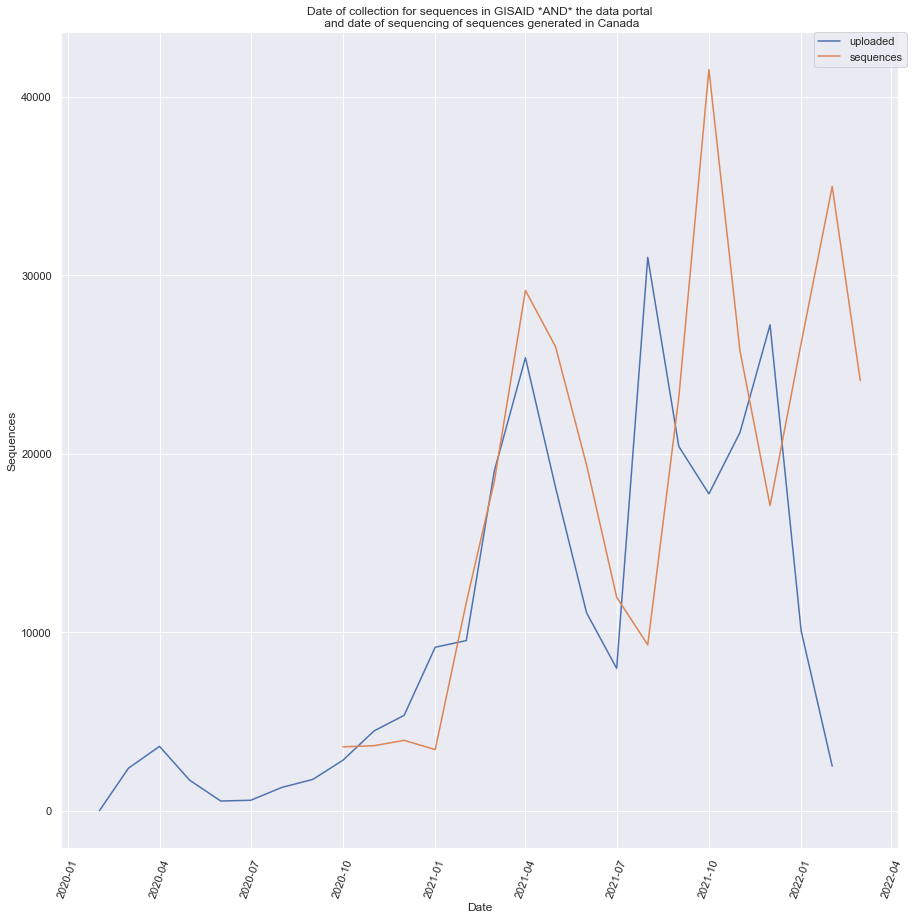

In [119]:
dims = (15, 15)
sns.set_theme(style = "darkgrid")
fig, ax = plt.subplots(figsize= dims)
sns.lineplot(x = "date", y = "value", hue = "variable", data=merged_melt)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Date of collection for sequences in GISAID *AND* the data portal\n and date of sequencing of sequences generated in Canada")
plt.ylabel("Sequences")
plt.xlabel("Date")
plt.xticks(rotation=70)
plt.show()